# data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./loan_demand_user_analysis.tsv",sep='\t')
data.columns = [x.split('.')[1] for x in data.columns]

In [3]:
data.head()

,uid,funds_channel_id,server_date,dsd_market_setup_sw_tag,dsd_loan_page_show_tag,dsd_loan_confirm_button_ck_tag,day_from_first_drip_disburse_succ_time,current_drip_credit_line,current_drip_credit_line_balance,current_drip_credit_line_use_rate,...,curren_drip_overdue_day_max,loan_model_v2_overdue_score,loan_model_v2_fraud_score,last_3_month_hit_pkg_prefix_cnt,last_3_month_hit_pkg_loan_cnt,last_3_month_hit_app_gamble_cnt,last_3_month_fastgulf_passenger_finish_order_actual_cost,last_30_day_fastgulf_passenger_finish_order_actual_cost,last_3_month_category_medicalcare_clinic_orders,last_3_month_category_finance_orders
0,100299,3038.0,2020-07-12,0,1,1,172.0,16000.0,6046.76,0.62,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10071683,NaN,2020-07-11,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10078453,3038.0,2020-07-10,0,1,1,178.0,12000.0,7032.41,0.41,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10155339,3027.0,2020-07-15,1,0,0,11.0,7400.0,0.00,1.00,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10364749,3038.0,2020-07-13,0,0,0,81.0,5000.0,490.65,0.90,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['uid', 'funds_channel_id', 'server_date', 'dsd_market_setup_sw_tag',
       'dsd_loan_page_show_tag', 'dsd_loan_confirm_button_ck_tag',
       'day_from_first_drip_disburse_succ_time', 'current_drip_credit_line',
       'current_drip_credit_line_balance', 'current_drip_credit_line_use_rate',
       'current_drip_interest_rate', 'last_30_day_drip_loan_num',
       'last_3_month_drip_loan_num', 'last_30_day_drip_loan_money',
       'last_3_month_drip_loan_money', 'current_drip_in_loan_money',
       'curren_drip_overdue_day_max', 'loan_model_v2_overdue_score',
       'loan_model_v2_fraud_score', 'last_3_month_hit_pkg_prefix_cnt',
       'last_3_month_hit_pkg_loan_cnt', 'last_3_month_hit_app_gamble_cnt',
       'last_3_month_fastgulf_passenger_finish_order_actual_cost',
       'last_30_day_fastgulf_passenger_finish_order_actual_cost',
       'last_3_month_category_medicalcare_clinic_orders',
       'last_3_month_category_finance_orders'],
      dtype='object')

In [5]:
data['current_drip_credit_line_balance_rate'] =1- data['current_drip_credit_line_balance'] / data['current_drip_credit_line']

In [9]:
data = data[(data['current_drip_credit_line_balance_rate']>=0) & (data['current_drip_credit_line_balance_rate']<=1)]

In [279]:
data['month_from_first_loan'] = data['day_from_first_drip_disburse_succ_time']//30

In [288]:
def gen_bin_set(data_set, x):
#     cuts = np.arange(int(10), 100, int(10))
#     cut_old = np.percentile(data_set['current_drip_credit_line_use_rate'], cuts) 
    bins=10
    umax=data_set[x].max()
    umin=data_set[x].min()
    umax=40
    step=(umax-umin)/bins
    fre_list=[umin+i*step for i in range(bins+1)]
    
    br_old = data_set.groupby(pd.cut(data_set[x], fre_list))['dsd_loan_confirm_button_ck_tag'].mean()
    df = pd.DataFrame({'confirm_rate': br_old})
    return df

In [452]:
data_1 = data[(data['current_drip_credit_line']>20000) & (data['current_drip_credit_line']>150000) ]

In [453]:
data_1['funds_channel_id'].value_counts()

3015.0    18381
3021.0    10153
3027.0     1501
3050.0      133
3026.0        6
3023.0        1
Name: funds_channel_id, dtype: int64

In [454]:
df = gen_bin_set(data_1,'month_from_first_loan')

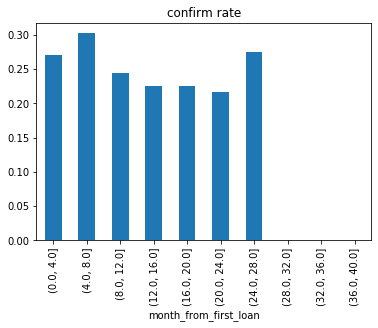

In [455]:
df['confirm_rate'].plot(kind='bar')
plt.title("confirm rate")
plt.show()

In [177]:
data_4 = data[(data['current_drip_credit_line']==10000) & (data['loan_model_v2_overdue_score']>600) ]

In [176]:
# data_4['current_drip_interest_rate'] = data_4['current_drip_interest_rate'].fillna(0)

/user/local/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


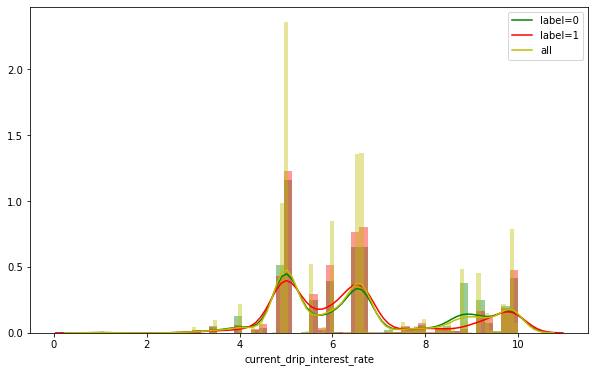

In [182]:
f, ax1 = plt.subplots(1, 1, sharex=True, figsize=(10, 6))

sns.distplot(data_4[data_4['dsd_loan_confirm_button_ck_tag'] == 0]['current_drip_interest_rate'],bins=50,color="g",kde_kws={"label": "label=0"})
sns.distplot(data_4[data_4['dsd_loan_confirm_button_ck_tag'] == 1]['current_drip_interest_rate'],bins=50,color="r",kde_kws={"label": "label=1"})
sns.distplot(data_4['current_drip_interest_rate'],bins=100,color="y",kde_kws={"label": "all"})



# Tree

In [1]:
import os
from sklearn import tree
import pydotplus 
from IPython.display import Image
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series
import random
from sklearn.externals import joblib
from scipy.stats import ks_2samp
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split

In [2]:
def ks(preds,y):
    get_ks = lambda preds,y: ks_2samp(preds[y==1], preds[y!=1]).statistic
    ks=get_ks(preds,y)
    return ks
def gini(preds,y):
    false_positive_rate, recall, thresholds = roc_curve(y,preds)  
    roc_auc = auc(false_positive_rate, recall)
    gini=2*roc_auc-1
    return gini

def binning(col,cut_points,labels=None):
    minval=col.min()
    maxval=col.max()
    breaks_points=[minval]+cut_points+[maxval]
    if not labels:
        labels=range(len(cut_points)+1)
    colBin=pd.cut(col,bins=breaks_points,labels=labels,include_lowest=True)
    return colBin

In [3]:
#读入数据处理变量
gf_sample=pd.read_csv('./loan_demand_user_analysis.tsv',delimiter='\t')
gf_sample.columns=[x.split('.')[1] for x in gf_sample.columns]

In [4]:
gf_sample['month_from_first_loan'] = gf_sample['day_from_first_drip_disburse_succ_time']//30

In [78]:
gf_sample.columns

Index(['uid', 'funds_channel_id', 'server_date', 'dsd_market_setup_sw_tag',
       'dsd_loan_page_show_tag', 'dsd_loan_confirm_button_ck_tag',
       'day_from_first_drip_disburse_succ_time', 'last_taken_time',
       'first_use_time', 'last_7_day_drip_taken_coupon_num',
       'last_30_day_drip_taken_coupon_num',
       'last_3_month_drip_taken_coupon_num',
       'last_7_day_drip_taken_type_1_coupon_num',
       'last_30_day_drip_taken_type_1_coupon_num',
       'last_3_month_drip_taken_type_1_coupon_num',
       'last_7_day_drip_taken_type_3_coupon_num',
       'last_30_day_drip_taken_type_3_coupon_num',
       'last_3_month_drip_taken_type_3_coupon_num',
       'last_7_day_drip_taken_type_2_coupon_num',
       'last_30_day_drip_taken_type_2_coupon_num',
       'last_3_month_drip_taken_type_2_coupon_num',
       'last_7_day_drip_use_coupon_num', 'last_30_day_drip_use_coupon_num',
       'last_3_month_drip_use_coupon_num', 'avg_use_value_amt',
       'last_7_day_drip_use_coupon_amt',

In [81]:
tmp = gf_sample[[#'dsd_market_setup_sw_tag',
       'month_from_first_loan', 'current_drip_credit_line',
       'current_drip_credit_line_balance', 'current_drip_credit_line_use_rate','current_drip_in_loan_money',
       'current_drip_interest_rate', 'last_30_day_drip_loan_num','last_3_month_drip_loan_num', 'last_30_day_drip_loan_money','last_3_month_drip_loan_money',
        'current_valid_coupon_num','his_taken_use_rate',
        'last_7_day_drip_taken_coupon_num','last_30_day_drip_taken_coupon_num','last_3_month_drip_taken_coupon_num',
        'last_7_day_drip_use_coupon_num','last_30_day_drip_use_coupon_num','last_3_month_drip_use_coupon_num','avg_use_value_amt',
        'last_7_day_drip_use_coupon_amt','last_30_day_drip_use_coupon_amt','last_3_month_drip_use_coupon_amt',
       'dsd_loan_confirm_button_ck_tag'
       ]]

In [82]:
tmp.isna().sum()

month_from_first_loan                  294370
current_drip_credit_line               175844
current_drip_credit_line_balance       175844
current_drip_credit_line_use_rate      201151
current_drip_in_loan_money             325418
current_drip_interest_rate             175844
last_30_day_drip_loan_num             1693556
last_3_month_drip_loan_num            1116695
last_30_day_drip_loan_money           1693556
last_3_month_drip_loan_money          1116695
current_valid_coupon_num               122714
his_taken_use_rate                      97342
last_7_day_drip_taken_coupon_num        97342
last_30_day_drip_taken_coupon_num       97342
last_3_month_drip_taken_coupon_num      97342
last_7_day_drip_use_coupon_num          97342
last_30_day_drip_use_coupon_num         97342
last_3_month_drip_use_coupon_num        97342
avg_use_value_amt                      129545
last_7_day_drip_use_coupon_amt          97659
last_30_day_drip_use_coupon_amt         98245
last_3_month_drip_use_coupon_amt  

In [83]:
# tmp['month_from_first_loan'] = tmp['month_from_first_loan'].fillna(10000)
# tmp['current_drip_credit_line_use_rate'] = tmp['current_drip_credit_line_use_rate'].fillna(1.0)

# cols = [
#         'current_drip_credit_line_balance',
#         'last_30_day_drip_loan_num','last_3_month_drip_loan_num','last_30_day_drip_loan_money','last_3_month_drip_loan_money','current_drip_in_loan_money',
#         'avg_use_value_amt','current_valid_coupon_num','his_taken_use_rate',
#        'last_7_day_drip_taken_coupon_num','last_30_day_drip_taken_coupon_num','last_3_month_drip_taken_coupon_num',
# #        'last_7_day_drip_taken_type_1_coupon_num','last_30_day_drip_taken_type_1_coupon_num','last_3_month_drip_taken_type_1_coupon_num',
# #        'last_7_day_drip_taken_type_2_coupon_num','last_30_day_drip_taken_type_1_coupon_num','last_3_month_drip_taken_type_1_coupon_num',
# #        'last_7_day_drip_taken_type_3_coupon_num','last_30_day_drip_taken_type_3_coupon_num','last_3_month_drip_taken_type_3_coupon_num',
#        'last_7_day_drip_use_coupon_num','last_30_day_drip_use_coupon_num','last_3_month_drip_use_coupon_num',
#        'last_7_day_drip_use_coupon_amt','last_30_day_drip_use_coupon_amt','last_3_month_drip_use_coupon_amt'
#        ]
# for col in cols:
#     tmp[col] = tmp[col].fillna(0)
tmp = tmp.dropna()

In [84]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822096 entries, 2 to 2565789
Data columns (total 23 columns):
month_from_first_loan                 822096 non-null float64
current_drip_credit_line              822096 non-null float64
current_drip_credit_line_balance      822096 non-null float64
current_drip_credit_line_use_rate     822096 non-null float64
current_drip_in_loan_money            822096 non-null float64
current_drip_interest_rate            822096 non-null float64
last_30_day_drip_loan_num             822096 non-null float64
last_3_month_drip_loan_num            822096 non-null float64
last_30_day_drip_loan_money           822096 non-null float64
last_3_month_drip_loan_money          822096 non-null float64
current_valid_coupon_num              822096 non-null float64
his_taken_use_rate                    822096 non-null float64
last_7_day_drip_taken_coupon_num      822096 non-null float64
last_30_day_drip_taken_coupon_num     822096 non-null float64
last_3_month_drip_ta

In [85]:
tmp.isna().sum()

month_from_first_loan                 0
current_drip_credit_line              0
current_drip_credit_line_balance      0
current_drip_credit_line_use_rate     0
current_drip_in_loan_money            0
current_drip_interest_rate            0
last_30_day_drip_loan_num             0
last_3_month_drip_loan_num            0
last_30_day_drip_loan_money           0
last_3_month_drip_loan_money          0
current_valid_coupon_num              0
his_taken_use_rate                    0
last_7_day_drip_taken_coupon_num      0
last_30_day_drip_taken_coupon_num     0
last_3_month_drip_taken_coupon_num    0
last_7_day_drip_use_coupon_num        0
last_30_day_drip_use_coupon_num       0
last_3_month_drip_use_coupon_num      0
avg_use_value_amt                     0
last_7_day_drip_use_coupon_amt        0
last_30_day_drip_use_coupon_amt       0
last_3_month_drip_use_coupon_amt      0
dsd_loan_confirm_button_ck_tag        0
dtype: int64

In [91]:
x=tmp[['month_from_first_loan', 'current_drip_credit_line','current_drip_credit_line_balance', 'current_drip_credit_line_use_rate',
       'current_drip_in_loan_money',
       'current_drip_interest_rate', 'last_30_day_drip_loan_num','last_3_month_drip_loan_num', 'last_30_day_drip_loan_money','last_3_month_drip_loan_money',
        'current_valid_coupon_num','his_taken_use_rate',
        'last_7_day_drip_taken_coupon_num',#'last_30_day_drip_taken_coupon_num','last_3_month_drip_taken_coupon_num',
        'last_7_day_drip_use_coupon_num',#'last_30_day_drip_use_coupon_num','last_3_month_drip_use_coupon_num','avg_use_value_amt',
        'last_7_day_drip_use_coupon_amt',#'last_30_day_drip_use_coupon_amt','last_3_month_drip_use_coupon_amt'
       ]]
y=tmp[['dsd_loan_confirm_button_ck_tag']]

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=0)
# x_train = x_train.fillna(0)
# x_test = x_test.fillna(0)

In [93]:
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4, min_samples_split=2, min_samples_leaf=1000, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, class_weight=None)
clf = clf.fit(x_train,y_train)

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=x_train.columns,   
                     filled=True, rounded=True,  
                     special_characters=True,proportion=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 

graph.write_pdf("loan_demand_tree1.pdf")

True

In [94]:
x_train['nodes'] = clf.apply(x_train)
nodes = x_train.nodes.unique().tolist()
print(nodes)

x_train = pd.concat([x_train,y_train],axis=1)
x_train = x_train[(x_train['nodes']!=4)&(x_train['nodes']!=5)&
                 (x_train['nodes']!=7)&(x_train['nodes']!=8)&
                 (x_train['nodes']!=19)&(x_train['nodes']!=20)].drop(['nodes'],axis=1)
y_train = x_train['dsd_loan_confirm_button_ck_tag']
x_train = x_train.drop('dsd_loan_confirm_button_ck_tag',axis=1)

clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4, min_samples_split=2, min_samples_leaf=1000, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, class_weight=None)
clf = clf.fit(x_train,y_train)

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=x_train.columns,   
                     filled=True, rounded=True,  
                     special_characters=True,proportion=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 

graph.write_pdf("loan_demand_tree2.pdf")

/user/local/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


[7, 4, 22, 12, 11, 5, 27, 30, 23, 20, 8, 26, 19, 14, 29, 15]


True

In [95]:
x_train['nodes'] = clf.apply(x_train)
nodes = x_train.nodes.unique().tolist()
print(nodes)

x_train = pd.concat([x_train,y_train],axis=1)
x_train = x_train[(x_train['nodes']!=4)&(x_train['nodes']!=5)&
                 (x_train['nodes']!=7)&(x_train['nodes']!=8)&
                 (x_train['nodes']!=26)].drop(['nodes'],axis=1)
y_train = x_train['dsd_loan_confirm_button_ck_tag']
x_train = x_train.drop('dsd_loan_confirm_button_ck_tag',axis=1)

clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4, min_samples_split=2, min_samples_leaf=1000, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, class_weight=None)
clf = clf.fit(x_train,y_train)

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=x_train.columns,   
                     filled=True, rounded=True,  
                     special_characters=True,proportion=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 

graph.write_pdf("loan_demand_tree3.pdf")

[19, 8, 5, 23, 27, 22, 20, 26, 29, 30, 4, 11, 14, 7, 15, 12]


True

In [73]:
from sklearn import metrics
def print_result(y_score, y_test, thr=0.5):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, pos_label = 1)
    print('auc:{}'.format(metrics.auc(fpr, tpr)))


In [74]:
y_score_train = clf.predict(x_train)
print_result(y_score_train, y_train)
y_score_test = clf.predict(x_test)
print_result(y_score_test, y_test)

auc:0.5314517835746999
auc:0.5309684363956242
